In [1]:
import weaviate

from PIL import Image
import math

import base64
from io import BytesIO

import random

In [2]:
client = weaviate.Client('http://localhost:8080/')

🤡 clown-face


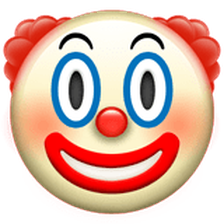

In [10]:
test = weaviate.util.image_encoder_b64('image.jpg')

sourceImage = { "image": test}

result = (
    client.query
    .get('Emoji',['name','image','emoji'])
    .with_near_image(sourceImage, encode=False)
    .with_limit(1)
    .do()
)

emoji = result['data']['Get']['Emoji'][0]
print(emoji['emoji'],emoji['name'])
im = Image.open(BytesIO(base64.b64decode(emoji['image'])))
display(im)

In [12]:
def sectionImage(im,X,Y):
    width, height = im.size
    #X, Y = math.ceil(width/244), math.ceil(height/244)
    new_width, new_height = X*224, Y*224

    im = im.resize((new_width, new_height), Image.LANCZOS) #If things start looking weird, check out this image resizing logic first

    sections=[]
    for y in range(0,Y):
        row=[]
        for x in range(0,X):
            area = (x*224, y*224, x*224+224, y*224+224)
            row.append(im.crop(area).convert('RGBA'))
        sections.append(row)

    return sections

im = Image.open("image.jpg")

sections = sectionImage(im,32,32)

In [4]:
def encodeImage(im):
    buffered = BytesIO()
    im.save(buffered, format="JPEG")
    encoded_image = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return encoded_image

def imageToEmoji(im):
    sourceImage = { "image": encodeImage(im)}

    result = (
        client.query
        .get('Emoji',['name','image','emoji'])
        .with_near_image(sourceImage, encode=False)
        .with_limit(1)
        .do()
    )
    emoji = result['data']['Get']['Emoji'][0]
    #print(emoji['emoji'],emoji['name'])
    #weaviate.util.image_decoder_b64(emoji['image'])
    return emoji['emoji']

def sectionsToEmojiMatrix(sections):
    emoji_matrix=[]
    for y in range(0,len(sections)):
        row=[]
        for x in range(0,len(sections[0])):
            row.append(imageToEmoji(sections[y][x]))
        emoji_matrix.append(row)
    return emoji_matrix

In [76]:
im = Image.open("image.jpg")
sections = sectionImage(im,32,32)
emoji_matrix = sectionsToEmojiMatrix(sections)

for y in range(0,len(emoji_matrix)):
    for x in range(0,len(emoji_matrix[0])):
        print(emoji_matrix[y][x],end="")
    print()

🤎👾🤎💔👾🤎🤎🤎🤍🤍🤍🤍🤍🤎🤎💗👾🤍💗👾👾🤍🤍🤍🤍💔💔🖤🗨💔💔💔💔💔🖤💣🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍💙💙💙💙
👾👾🤎🤎🤎🤎🤎🤎🤐🤍🤍🤎🤎🤎👾👾👾👾👾👾👾👾👾👾👾🤎🤎💔💔💔💔💔💔💔💔💣🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍💗💙💙💙
🤎🤎🤎🤎🤎🤎🤎🤎🤩🤎👾🤎🤎🤎🤎🤎🤎🤎👾🤎👾👾🤎👾🤎💔💔💔💔🗨💔🗨💔💔🤎🗨🗨🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍💙💙💙
🤎🤎🤎💔🤎🤎💔🤎🤎👾🤎🤎🤎🤎👾👾🤎🤎🤎🤎🤎🤎🤎💔🤎🗨💔💔💔💔💔💢💔💔💔🗨💣🗨🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍💙💙💙
🤎🤎👾🤎👾🤎🤎🤎💔🤎🤎🤎💔🤎🤎🤎🤎🤎💔👾🤎🤎💔🤎🤎💔🗨🗨🗨🗨💔💔🗨🗨💔💔💔💣💣🗨🤍🤍🤍🤍💌💣💌🗨🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍💗💙💙💙
🤎🤎🤎🤎🤎👾🤎🤎🤎👾🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎💔🤎💔💔💔💔💔🗨🗨💔💔🗨💔💔💔💣🗨🗨🗨💌🤎🤎👾🤎🗨💣🗨🤍🤍🤍🤍🤍🤍🤍🤎🤍👾💌🤎💙
🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎💔🤎🗨🗨💢👹💔💔💔💔💔🗨🗨💔💔💔💔💔💔💔💔👾👾🤎🤎👾🤎🤎🤎🗨🗨💣🤎🤠🤒🤠👾🤎💗👾🤠
🤎🤎🤎🤎🤎🤎🤎🤎💔🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎💔🤎🤎🤎🤎🤎🗨💔🗨💢🗨💔💔💔🗨💔💔💔💔💔👾💔🤎💔👾🤎🤎🤎🤎🤎💔💔💔🤎💔🤎💔🤍👾🤩💔🤎🤎
🤎🤎🤎🤎🤎🤎💔🤎🤎💔🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎💔🤎🤎💔🤎🗨💔💔💢🗨🗨💔🗨🗨💔💔💔🤎💔🤎💔🤎💔🤎💔💔👾🤎🤎👾🤎🤎💌🤎🗨💔💔👾
🤎🤎🤎🤎💔💔🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎👾💔🤎🤎🤎🤎🤎🤎💔🗨🤎💔💔💔💔💔💔💔💔💢💔💔🤎🤎🤎💔👾👾💔🤎💔🤎🤎🤎🤍🤎🤍🤍🤍🤍🤎🤎💔
🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎💔🤎🤎💔🤎🤎🤎💔🤎🤎🤎💔💔💔💔💔🗨💔💔💔💔💔🤎🤎🤎💔💔🤎🤎💔🤎🤎🤎🤎🤎🤍🤍🤍🤎🤍🤍🤍
🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎💔🤎🤎🤎🤎🤎🤎💜🤎🤎💔💔🤎💔💔💢💔💔💔🗨🤎💔🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎👾🤍🤍🤍🤍🤍🤍👾
🤎🤎🤎👾🤎🤎🤎💔🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎💔🤎🤎🤎🤎🤎🤎🤎🤎🤎💔💔💔🗨💢💢💢💔🗨💔💔💔🤎🤎👾🤎💔👾🤎🤎🤎🤎🤍🤍🤍🤍🤍🤍🤍💌💥
💔👾🤎🤎🤎💔🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎💔🤎🤎🤎🤎🤎🤎💔🤎💔💔💔💔💔🗨🗨💔💔💢💔💔🤎🤎🤎🤎🤎🤎🤎🤎🤍🤎🤍🤍🤍🤍🤍🤍🤍🤍🤍
🤎💔🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎👾🤎🤎🤎🤎🤎🤎🤎🤎🤎👾🤎💔🤎🤎🤎💔💔🤎🗨💔💔🗨💔🗨🗨💔💔💔💔💢💔🤎🤎🤎💔🤎👾👾🤎🤍🤍🤍🤍🤍🤍🤍🤍🤍🤍
👾👾💗🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤍🤍🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎

In [13]:
def imageToEmojiImage(im):
    sourceImage = { "image": encodeImage(im)}

    result = (
        client.query
        .get('Emoji',['name','image','emoji'])
        .with_near_image(sourceImage, encode=False)
        .with_limit(1)
        .do()
    )
    emoji = result['data']['Get']['Emoji'][0]
    #print(emoji['emoji'],emoji['name'])
    #weaviate.util.image_decoder_b64(emoji['image'])
    return Image.open(BytesIO(base64.b64decode(emoji['image'])))


def emojiMatrixImage(sections):
    emoji_matrix_image = Image.new('RGBA', (len(sections[0])*224, len(sections)*224))
    for y in range(0,len(sections)):
        for x in range(0,len(sections[0])):
            image = imageToEmojiImage(sections[y][x])
            emoji_matrix_image.paste(image, (x*224,y*224))
    return emoji_matrix_image

im = Image.open("image2.png")
sections = sectionImage(im,128,128)
result_image = emojiMatrixImage(sections)
result_image.save('result_image.png')
display(result_image)

OSError: cannot write mode RGBA as JPEG